This notebook uses a popular plant protein database to find proteins that are less than 200 amino acids and also membrane bound or associated using pandas.

link to plant image

Plant database "p3db-3.5-phosphoprotein-report" downloaded 11 May 2020 from http://www.p3db.org/download.php




In [1]:
import pandas as pd

In [21]:
# import tab separated file
df = pd.read_csv('p3db-3.5-phosphoprotein-report',sep='\t')

# stats and header row to show data
display (df.info())
display (df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16477 entries, 0 to 16476
Data columns (total 6 columns):
P3DB Protein ID    16477 non-null int64
Xref               16477 non-null object
Annotation         15477 non-null object
Sequence           16477 non-null object
Organism           16477 non-null object
PubMed             16439 non-null object
dtypes: int64(1), object(5)
memory usage: 772.4+ KB


None

,P3DB Protein ID,Xref,Annotation,Sequence,Organism,PubMed
0,1,EMBL:AAF79563.1;EMBL:AAL36245.1;EMBL:AAM51392....,ribosomal protein L4,MASSATAPNSLSFFSSSLFLSSSHQIPKTYISVSKLGSGRVSKPLS...,Arabidopsis thaliana,19376835
1,2,EMBL:AAG50543.1;EMBL:AAK59447.1;EMBL:AAL34294....,basic helix-loop-helix (bHLH) DNA-binding supe...,MESEFQQHHFLLHDHQHQRPRNSGLIRYQSAPSSYFSSFGESIEEF...,Arabidopsis thaliana,19376835
2,3,PRF:2305384DB;EMBL:AAM15515.1;EMBL:AAT68731.1;...,ATP synthase 9 mitochondrial,MYLLIVFLSMLSSSVAGFFGRFLGSESVSRFNLIIFLILLVFSICL...,Arabidopsis thaliana,19253305
3,4,PDB:1VDY;PDB:2DCP;EMBL:AAB63649.1;EMBL:AAK2595...,ENTH/VHS family protein,MDTSRRAVESYWRSRMIDAVTSDEDKVAPVYKLEEICDLLRSSHVS...,Arabidopsis thaliana,19376835;19245862
4,5,TAIR:AT1G73770.1,FUNCTIONS IN: molecular_function unknown; INVO...,MRRFLQRVPSLLARNILHSPANFRHLRINNPRVVVPLFERAISRFV...,Arabidopsis thaliana,19688752;19376835;18463617


In [28]:
# add a column 'Seq_Length' to df
# count aa in "Sequence" column and put integer into 'Seq_Length'
df['Seq_Length']= df['Sequence'].apply(lambda x: len(x))

#confirm length
display (df.head())

,P3DB Protein ID,Xref,Annotation,Sequence,Organism,PubMed,Seq_Length
0,1,EMBL:AAF79563.1;EMBL:AAL36245.1;EMBL:AAM51392....,ribosomal protein L4,MASSATAPNSLSFFSSSLFLSSSHQIPKTYISVSKLGSGRVSKPLS...,Arabidopsis thaliana,19376835,282
1,2,EMBL:AAG50543.1;EMBL:AAK59447.1;EMBL:AAL34294....,basic helix-loop-helix (bHLH) DNA-binding supe...,MESEFQQHHFLLHDHQHQRPRNSGLIRYQSAPSSYFSSFGESIEEF...,Arabidopsis thaliana,19376835,379
2,3,PRF:2305384DB;EMBL:AAM15515.1;EMBL:AAT68731.1;...,ATP synthase 9 mitochondrial,MYLLIVFLSMLSSSVAGFFGRFLGSESVSRFNLIIFLILLVFSICL...,Arabidopsis thaliana,19253305,262
3,4,PDB:1VDY;PDB:2DCP;EMBL:AAB63649.1;EMBL:AAK2595...,ENTH/VHS family protein,MDTSRRAVESYWRSRMIDAVTSDEDKVAPVYKLEEICDLLRSSHVS...,Arabidopsis thaliana,19376835;19245862,690
4,5,TAIR:AT1G73770.1,FUNCTIONS IN: molecular_function unknown; INVO...,MRRFLQRVPSLLARNILHSPANFRHLRINNPRVVVPLFERAISRFV...,Arabidopsis thaliana,19688752;19376835;18463617,191


In [33]:
display (df['Seq_Length'].describe())

count    16477.000000
mean       582.040420
std        418.374157
min         29.000000
25%        303.000000
50%        486.000000
75%        738.000000
max       5622.000000
Name: Seq_Length, dtype: float64

In [38]:
# How many sequnces are less than 200 aa?
seq_lt_th=df[df['Seq_Length'] < 200]
display (seq_lt_th.describe())
display (seq_lt_th.head())

,P3DB Protein ID,Seq_Length
count,1832.000000,1832.000000
mean,8597.331332,143.260917
std,4615.842441,36.872307
min,5.000000,29.000000
25%,4568.500000,114.750000
50%,9622.000000,148.000000
75%,11795.250000,175.000000
max,16495.000000,199.000000


,P3DB Protein ID,Xref,Annotation,Sequence,Organism,PubMed,Seq_Length
4,5,TAIR:AT1G73770.1,FUNCTIONS IN: molecular_function unknown; INVO...,MRRFLQRVPSLLARNILHSPANFRHLRINNPRVVVPLFERAISRFV...,Arabidopsis thaliana,19688752;19376835;18463617,191
13,14,EMBL:AAM64550.1;EMBL:AAO42921.1;Ensembl Genome...,cAMP-regulated phosphoprotein 19-related protein,MATDCNRVNDFLFSQQQESTSGANKYGGLVPKKKPLISKDSKRAFF...,Arabidopsis thaliana,19376835;18463617,102
15,16,EMBL:AAL06568.1;EMBL:AAM64361.1;EMBL:AAV84505....,FUNCTIONS IN: molecular_function unknown; INVO...,MVEKSGGEVNFPKLEKPTGKKQTATVVVGVLAVGWLAIELVFKPLF...,Arabidopsis thaliana,19376835,69
24,25,TAIR:AT1G18210.1,Calcium-binding EF-hand family protein,MASANPETAKPTPATVDMANPEELKKVFDQFDSNGDGKISVLELGG...,Arabidopsis thaliana,19376835;19245862;18463617;17317660,170
43,44,EMBL:AAD55605.1;EMBL:AAM65780.1;EMBL:AAO50608....,Putative thiol-disulphide oxidoreductase DCC,MAILIPASFGRLTITSRAQVRVRVSASANQRTIRRDSVDWVKETSS...,Arabidopsis thaliana,22060019;18463617,172


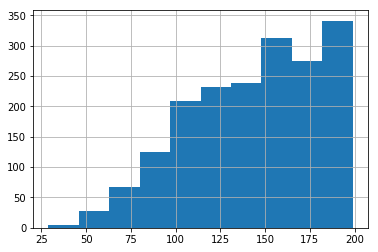

In [40]:
seq_lt_th['Seq_Length'].hist()

In [57]:
#find 'Annotation' where membrane is mentioned
df['Membrane'] = df['Annotation'].apply(lambda x: 'membrane' in str(x)) 

#How many proteins are membrane?
display (df['Membrane'].value_counts())


False    16189
True       288
Name: Membrane, dtype: int64

In [66]:
# how many proteins < 200 aa are also membrane?
mem_lt_th = df[(df['Membrane']==True) & (df['Seq_Length'] < 200)]

display (mem_lt_th.describe())

,P3DB Protein ID,Seq_Length
count,45.000000,45.000000
mean,4901.133333,138.400000
std,4819.848661,41.751102
min,16.000000,51.000000
25%,1019.000000,102.000000
50%,2456.000000,145.000000
75%,9299.000000,178.000000
max,15456.000000,196.000000
